# EXPLORATORY ANALYSIS OF THE STEAM LIBRARY

In this project I'll be conducting an exploratory analysis on the steam library data this dataset was scaped and cleaned by Nik Davis on https://www.kaggle.com/nikdavis/steam-store-games

## Table of contents:
* [Import](#first-bullet)
* [Import Check](#second-bullet)
* [Sorting dataframe by positive ratings](#second-bullet)
* [Figure 1 - Top Positively rated Free games on steam](#second-bullet)
* [Insight 1 - Three of the top 5 games with highest negative rating also appear in the top 5 most positive rated list](#second-bullet)

### Import

In [10]:
import numpy as np #General numpy library
import pandas as pd #Data manipulation
import seaborn as sb #plots

In [11]:
steam_df = pd.read_csv('/users/ehijator/downloads/Ehi/steam project/steam.csv') #ReadingCSV

### Import Check

In [12]:
print(steam_df.head(10)) 

   appid                            name release_date  english  \
0     10                  Counter-Strike   2000-11-01        1   
1     20           Team Fortress Classic   1999-04-01        1   
2     30                   Day of Defeat   2003-05-01        1   
3     40              Deathmatch Classic   2001-06-01        1   
4     50       Half-Life: Opposing Force   1999-11-01        1   
5     60                        Ricochet   2000-11-01        1   
6     70                       Half-Life   1998-11-08        1   
7     80  Counter-Strike: Condition Zero   2004-03-01        1   
8    130           Half-Life: Blue Shift   2001-06-01        1   
9    220                     Half-Life 2   2004-11-16        1   

          developer publisher          platforms  required_age  \
0             Valve     Valve  windows;mac;linux             0   
1             Valve     Valve  windows;mac;linux             0   
2             Valve     Valve  windows;mac;linux             0   
3        

### Sorting dataframe by positive ratings

#### Here i decided to only include games that have been accquired by at least 500,000 to aviod skewing calculations.

In [13]:
steam_df.sort_values(by= 'positive_ratings') #sorting

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
20596,806930,Castle Secrets: Between Day and Night,2018-03-07,1,Komar Games,Dikobraz Games,windows,0,Single-player,Adventure;Casual;Indie;RPG,Adventure;RPG;Indie,0,0,1,0,0,0-20000,7.19
577,32000,Raycatcher,2009-04-17,1,Thinking Studios;Slam Dunk Studios,Thinking Studios,windows,0,Single-player,Indie;Casual,Indie;Casual,0,0,13,0,0,0-20000,3.99
25882,991150,Crashy Racing,2018-12-20,1,Dexion Games,Dexion Games,windows,0,Single-player,Casual;Indie;Racing;Sports,Indie;Casual;Sports,0,0,1,0,0,0-20000,0.79
22397,861790,Bomb-Bomb,2018-05-17,1,Vito Devs,Vito Devs,windows,0,Single-player;Shared/Split Screen,Action;Casual;Indie,Action;Indie;Casual,1,0,1,0,0,0-20000,1.69
25879,991090,Snake VS Block Numbers,2018-12-21,1,Dexion Games,Dexion Games,windows,0,Single-player,Casual;Indie;Strategy,Casual;Indie;Strategy,0,0,1,0,0,0-20000,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.00
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00


* New table called newdf which will contain only records with more than 500,000 owners

In [14]:
newdf = steam_df.sort_values(by= "owners")

In [15]:

newdf = newdf[newdf.owners != '0-20000'] 
newdf = newdf[newdf.owners != '20000-50000']
newdf = newdf[newdf.owners != '50000-100000']
newdf = newdf[newdf.owners != '100000-200000']
newdf = newdf[newdf.owners != '200000-500000']

* creating freegames table to be able to check highest positive rating for free games only

In [57]:
#free games that have highest positive ratings
freegames = newdf[newdf.price == 0.00]

topratings = freegames.sort_values(by= 'positive_ratings', ascending = False)
top5ratings = topratings.head(5)

In [34]:
top5ratings

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.0
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.0
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.0
3362,304930,Unturned,2017-07-07,1,Smartly Dressed Games,Smartly Dressed Games,windows;mac;linux,0,Single-player;Online Multi-Player;Online Co-op...,Action;Adventure;Casual;Free to Play;Indie,Free to Play;Survival;Zombies,46,292574,31482,3248,413,20000000-50000000,0.0
1634,230410,Warframe,2013-03-25,1,Digital Extremes,Digital Extremes,windows,16,Single-player;Multi-player;Co-op;Steam Trading...,Action;Free to Play,Free to Play;Action;Co-op,187,226541,20268,5845,394,20000000-50000000,0.0


### Figure 1 - Top Positively rated Free games on steam

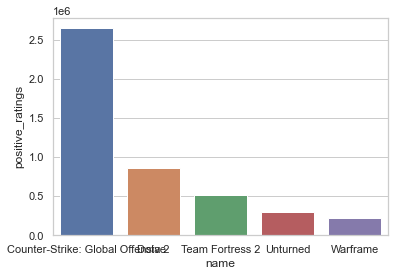

In [69]:
sb.set_theme(style="whitegrid")
figure1 = sb.barplot(x='name',y='positive_ratings',data=top5ratings)

### Bottom or least positive ratings

In [64]:
bottom_Posratings = freegames.sort_values(by= 'positive_ratings', ascending = False)
bottom_Pos5ratings = bottom_Posratings.tail(5)
bottom_Pos5ratings

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
21118,822240,Animal Jam - Play Wild!,2018-12-11,1,"WildWorks, Inc.","WildWorks, Inc.",windows,0,Online Multi-Player;MMO;Cross-Platform Multipl...,Adventure;Free to Play;Massively Multiplayer;S...,Early Access;Free to Play;Massively Multiplayer,0,409,1278,0,0,500000-1000000,0.0
230,9160,Master Levels for Doom II,2007-08-03,1,id Software,id Software,windows,0,Single-player;Steam Cloud,Action,Action;FPS;Classic,0,310,69,7,12,500000-1000000,0.0
294,12170,Grand Theft Auto,2008-01-04,1,Rockstar North,Rockstar Games,windows,0,Single-player,Action,Action;Classic;Open World,0,199,30,7,7,500000-1000000,0.0
295,12180,Grand Theft Auto 2,2008-01-04,1,Rockstar North,Rockstar Games,windows,0,Single-player,Action,Action;Classic;Open World,0,184,17,3,4,500000-1000000,0.0
3990,326960,Killing Floor - Toy Master,2014-10-16,1,David Hensley;Alex Quick,Tripwire Interactive,windows;mac;linux,0,Single-player;Co-op,Action,Free to Play;Horror;Multiplayer,0,21,2,1,1,500000-1000000,0.0


### Figure 2 - Bottom or least positive ratings

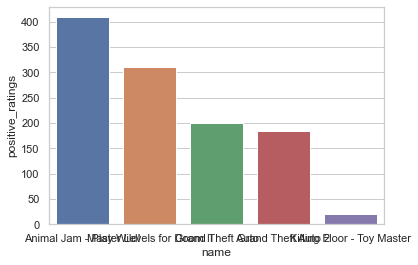

In [68]:
sb.set_theme(style="whitegrid")
figure2 = sb.barplot(x='name',y= 'positive_ratings',data=bottom_Pos5ratings)

### Insight 1 - Three of the top 5 games with highest negative rating also appear in the top 5 most positive rated list

* this could be due to post content release according to steam in their review documentaion
    
_"if a user leaves a negative review for a game and subsequently continues to log substantial playtime, Steam may prompt them to update their review. This can be valuable in cases where issues customers had at the time of their review may have been addressed or their opinion of the game has changed."_

_source: https://partner.steamgames.com/doc/store/reviews

In [61]:
topNegativeratings = freegames.sort_values(by= 'negative_ratings',ascending = False)
top5negativeratings = topNegativeratings.head(5)
top5negativeratings
                                           

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.0
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.0
7809,433850,Z1 Battle Royale,2018-02-28,1,NantG,Daybreak Game Company,windows,0,Multi-player;Online Multi-Player;In-App Purchases,Action;Adventure;Free to Play;Massively Multip...,Survival;Massively Multiplayer;Multiplayer,0,111434,91664,3142,162,10000000-20000000,0.0
1607,227940,Heroes & Generals,2016-10-18,1,RETO MOTO,RETO MOTO,windows,0,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Free to Play;Indie;Massively Multiplayer,Free to Play;World War II;Multiplayer,0,65856,34416,1752,76,10000000-20000000,0.0
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.0


### Figure 3 - Top 5 Negative Ratings

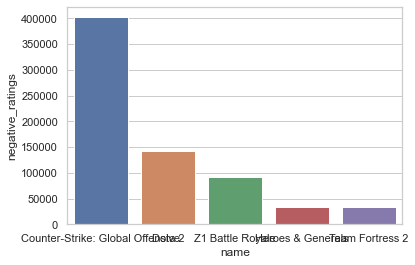

In [70]:
sb.set_theme(style="whitegrid")
figure3 = sb.barplot(x='name',y= 'negative_ratings',data=top5negativeratings)